# Отток клиентов

***Цель проекта*** - построение модели, прогнозирующей уйдет ли клиент из банка в ближайшее время или нет.

***Задачи проекта:***

1. Изучить предоставленные данные;
2. Провести исследовательский анализ данных;
3. Построить несколько прогнозных моделей и выбрать лучшую;
4. Протестировать выбранную модель.


## Подготовка данных

### Изучение данных

Для того, чтобы понять, с какими данными необходимо работать, изучим их.

In [1]:
#импортируем все необходимые библиотеки

import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.utils import shuffle

In [2]:
#откроем файл

data = pd.read_csv('/datasets/Churn.csv')

#выведем на печать первые 10 строк датасета

data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


Согласно хорошему стилю написания кода и для более приятного визуального восприятия, переименуем столбцы в соответствии со змеиным регистром.

In [3]:
#переименуем столбцы, используя регулярное выражение

for name in data.columns:
    rena = re.sub(r"(?=[A-Z])(?!^)", '_', name).lower()
    data = data.rename(columns={name:rena})
    
#выведем первые 10 строк на экран

data.head(10)

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [4]:
#просмотрим информацию о датасете

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_number        10000 non-null  int64  
 1   customer_id       10000 non-null  int64  
 2   surname           10000 non-null  object 
 3   credit_score      10000 non-null  int64  
 4   geography         10000 non-null  object 
 5   gender            10000 non-null  object 
 6   age               10000 non-null  int64  
 7   tenure            9091 non-null   float64
 8   balance           10000 non-null  float64
 9   num_of_products   10000 non-null  int64  
 10  has_cr_card       10000 non-null  int64  
 11  is_active_member  10000 non-null  int64  
 12  estimated_salary  10000 non-null  float64
 13  exited            10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
#посчитаем количество пропусков

data.isna().sum()

row_number            0
customer_id           0
surname               0
credit_score          0
geography             0
gender                0
age                   0
tenure              909
balance               0
num_of_products       0
has_cr_card           0
is_active_member      0
estimated_salary      0
exited                0
dtype: int64

Как видно из информации о пропусках, есть пропуски в столбце с данными о количестве лет обслуживания клиентов в банке. Поскольку пропусков порядка 9%, то обработаем их методом заполнения медианным значением.

In [6]:
#заполним данные в столбце 'tenure' медианным значением

data = data.fillna(data['tenure'].median())

In [7]:
#проверим количетво пропусков

data.isna().sum()

row_number          0
customer_id         0
surname             0
credit_score        0
geography           0
gender              0
age                 0
tenure              0
balance             0
num_of_products     0
has_cr_card         0
is_active_member    0
estimated_salary    0
exited              0
dtype: int64

In [8]:
#посчитаем количество дубликатов

data.duplicated().sum()

0

### Вывод

Данные о клиентах банка изучены, предобработаны: пропуски в столбце c данными о кличестве лет обслуживания клиентов в банке заменены медианным значением, дубликатов не обнаружено. Данные готовы для дальнейшего анализа.

## Исследовательский анализ данных

Для того, чтобы понять есть ли зависимости между количественными данными, проведем небольшой исследовательский анализ.

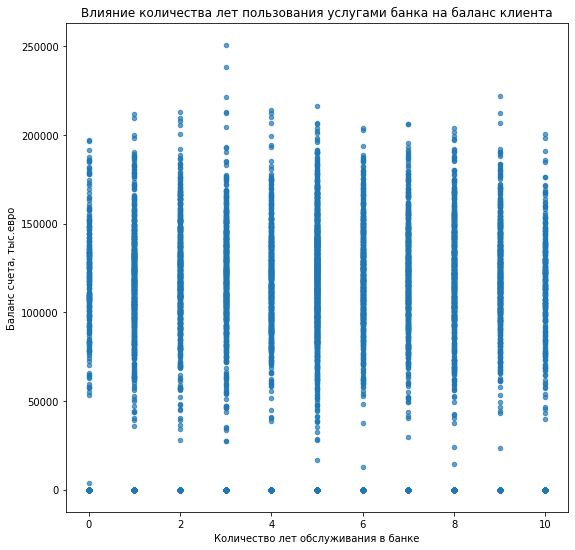

In [9]:
#построим график рассеивания, показывающий зависимость между количеством лет пользования услугами 
#банка и балансом клиента

#зададим все необходимые параметры

data.plot(kind='scatter', x = 'tenure', y = 'balance', figsize = (9,9), alpha = 0.7, 
       title = 'Влияние количества лет пользования услугами банка на баланс клиента')

#зададим подписи осей

plt.xlabel('Количество лет обслуживания в банке')
plt.ylabel('Баланс счета, тыс.евро')

#выведем график на экран

plt.show()

In [10]:
#посчитаем коэффициент корреляции между количеством лет пользования услугами банка и балансом клиента

print('Коэффициент корреляции между количеством лет пользования услугами банка и балансом клиента:', data['tenure'].corr(data['balance']).round(2))

Коэффициент корреляции между количеством лет пользования услугами банка и балансом клиента: -0.01


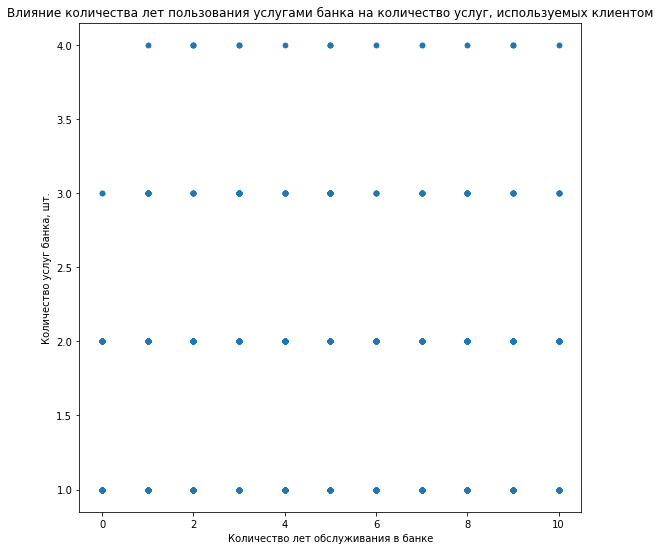

In [11]:
#построим график рассеивания, показывающий зависимость между количеством лет пользования услугами 
#банка и количеством услуг банка, используемых клиентом

#зададим все необходимые параметры

data.plot(kind='scatter', x = 'tenure', y = 'num_of_products', figsize = (9,9), alpha = 0.7, 
       title = 'Влияние количества лет пользования услугами банка на количество услуг, используемых клиентом')

#зададим подписи осей

plt.xlabel('Количество лет обслуживания в банке')
plt.ylabel('Количество услуг банка, шт.')

#выведем график на экран

plt.show()

In [12]:
#посчитаем коэффициент корреляции между количеством лет пользования услугами банка и количеством продуктов

print('Коэффициент корреляции между количеством лет пользования услугами банка и количеством продуктов:', data['tenure'].corr(data['num_of_products']).round(2))

Коэффициент корреляции между количеством лет пользования услугами банка и количеством продуктов: 0.01


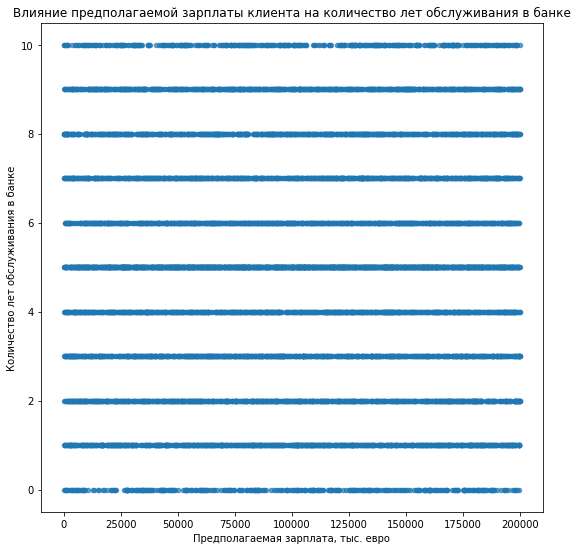

In [13]:
#построим график рассеивания, показывающий зависимость между количеством лет пользования услугами 
#банка и предполагаемой зарплатой клиента

#зададим все необходимые параметры

data.plot(kind='scatter', x = 'estimated_salary', y = 'tenure', figsize = (9,9), alpha = 0.7, 
       title = 'Влияние предполагаемой зарплаты клиента на количество лет обслуживания в банке')

#зададим подписи осей

plt.xlabel('Предполагаемая зарплата, тыс. евро')
plt.ylabel('Количество лет обслуживания в банке')

#выведем график на экран

plt.show()

In [14]:
#посчитаем коэффициент корреляции между количеством лет пользования услугами 
#банка и предполагаемой зарплатой клиента

print('Коэффициент корреляции между между количеством лет пользования услугами банка и предполагаемой зарплатой клиента:', data['tenure'].corr(data['estimated_salary']).round(2))

Коэффициент корреляции между между количеством лет пользования услугами банка и предполагаемой зарплатой клиента: 0.01


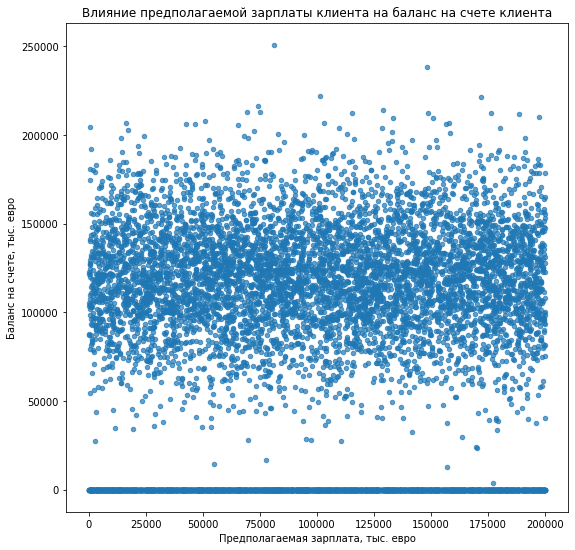

In [15]:
#построим график рассеивания, показывающий зависимость между предполагаемой зарплатой клиента 
#банка и балансом на счете клиента

#зададим все необходимые параметры

data.plot(kind='scatter', x = 'estimated_salary', y = 'balance', figsize = (9,9), alpha = 0.7, 
       title = 'Влияние предполагаемой зарплаты клиента на баланс на счете клиента')

#зададим подписи осей

plt.xlabel('Предполагаемая зарплата, тыс. евро')
plt.ylabel('Баланс на счете, тыс. евро')

#выведем график на экран

plt.show()

In [16]:
#посчитаем коэффициент корреляции между предполагаемой зарплатой клиента банка и балансом на 
#счете клиента

print('Коэффициент корреляции между предполагаемой зарплатой клиента банка и балансом на счете клиента:', data['balance'].corr(data['estimated_salary']).round(2))

Коэффициент корреляции между предполагаемой зарплатой клиента банка и балансом на счете клиента: 0.01


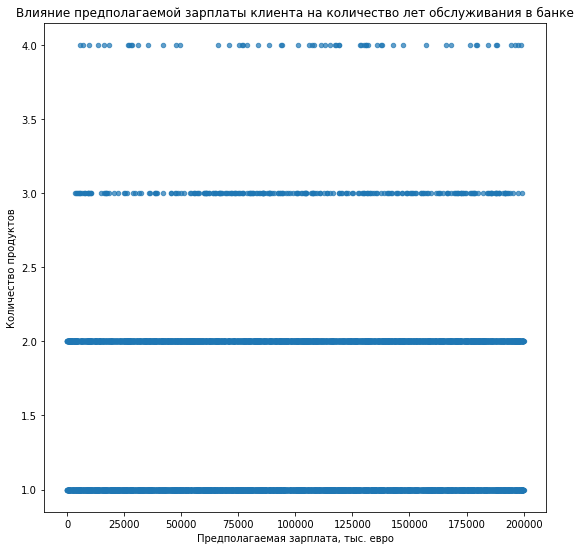

In [17]:
#построим график рассеивания, показывающий зависимость между предполагаемой зарплатой клиента и 
#количеством продуктов

#зададим все необходимые параметры

data.plot(kind='scatter', x = 'estimated_salary', y = 'num_of_products', figsize = (9,9), alpha = 0.7, 
       title = 'Влияние предполагаемой зарплаты клиента на количество лет обслуживания в банке')

#зададим подписи осей

plt.xlabel('Предполагаемая зарплата, тыс. евро')
plt.ylabel('Количество продуктов')

#выведем график на экран

plt.show()

In [18]:
#посчитаем коэффициент корреляции между предполагаемой зарплатой клиента и количеством продуктов

print('Коэффициент корреляции между предполагаемой зарплатой клиента и количеством продуктов:', data['num_of_products'].corr(data['estimated_salary']).round(2))

Коэффициент корреляции между предполагаемой зарплатой клиента и количеством продуктов: 0.01


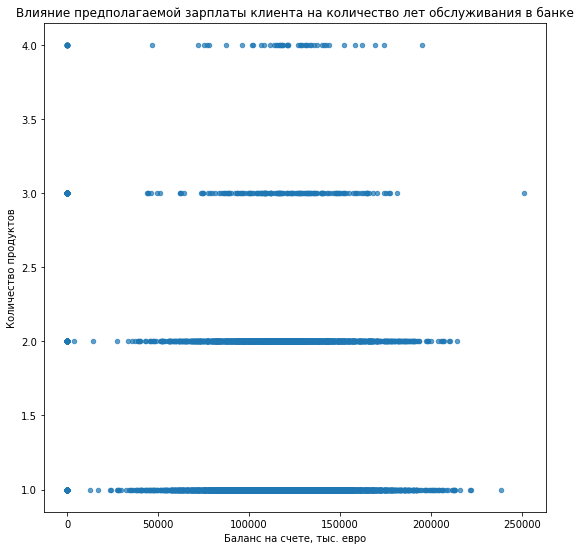

In [19]:
#построим график рассеивания, показывающий зависимость между балансом на счете и количеством 
#продуктов

#зададим все необходимые параметры

data.plot(kind='scatter', x = 'balance', y = 'num_of_products', figsize = (9,9), alpha = 0.7, 
       title = 'Влияние предполагаемой зарплаты клиента на количество лет обслуживания в банке')

#зададим подписи осей

plt.xlabel('Баланс на счете, тыс. евро')
plt.ylabel('Количество продуктов')

#выведем график на экран

plt.show()

In [20]:
#посчитаем коэффициент корреляции между балансом на счете и количеством продуктов

print('Коэффициент корреляции между балансом на счете и количеством продуктов:', data['balance'].corr(data['num_of_products']).round(2))

Коэффициент корреляции между балансом на счете и количеством продуктов: -0.3


### Вывод

Исходя из проведенного исследовательского анализа видно, что нет сильной корреляции между количественными признаками: балансом на счете клиента, предполагаемой зарплатой, количеством лет обслуживания в банке и количеством продуктов банка. Но будем использовать все количественные признаки для построения модели, поскольку могут быть взаимосвзяи с категориальными признаками, которые не очевидны.

## Обучение моделей с учетом дисбаланса

### Разбиение данных на выборки

Для разбиения данных на выборки изучим дисбаланс, а также закодируем категориальные данные техникой OHE.

In [21]:
#изучим классы

data['exited'].value_counts()

0    7963
1    2037
Name: exited, dtype: int64

Исходя из информации о классах видно, что мы имеем дело с дисбалансом, поскольку класс 0 встречается почти в 4 раза чаще класса 1.

In [22]:
#закодируем категориальные признаки датасета

# data_ohe = pd.get_dummies(data,drop_first = True)

# #выведем первые 10 строк на экран

# data_ohe.head(10)

При выделении признаков для построения модели удалим те, которые нам не нужны: номер строки, фамилия, id.

In [23]:
#выделим признаки для построения модели

features = data.drop(['row_number','surname','customer_id', 'exited'], axis=1)

#выделим целевой признак

target = data['exited']

In [24]:
features = pd.get_dummies(features,drop_first = True)

#выведем первые 10 строк на экран

features.head(10)

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,1,0
5,645,44,8.0,113755.78,2,1,0,149756.71,0,1,1
6,822,50,7.0,0.00,2,1,1,10062.80,0,0,1
7,376,29,4.0,115046.74,4,1,0,119346.88,1,0,0
8,501,44,4.0,142051.07,2,0,1,74940.50,0,0,1
9,684,27,2.0,134603.88,1,1,1,71725.73,0,0,1


In [25]:
#разделим данные на 3 выборки: тренировочную, валидационную и тестовую в соотношении 3:1:1

features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=12345, stratify=target)

features_valid, features_test, target_valid, target_test = train_test_split(features_valid, target_valid, test_size=0.5, random_state=12345, stratify=target_valid)

In [26]:
#проверим объем признаков тренировочной выборки

features_train.shape

(7500, 11)

In [27]:
#проверим объем признаков валидационной выборки

features_valid.shape

(1250, 11)

### Модель логистической регрессии

Изучим данные колонок с указанием возраста и предполагаемой зарплаты, чтобы понять нужно ли их масштабировать.

In [28]:
#изучим данные колонки 'age'

data['age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: age, dtype: float64

Видно, что разбежка между максимальным и минимальным значением достаточно большая (92 года и 18 лет соотвественно), поэтому необходимо масштабировать данные о возрасте клиентов.

In [29]:
#изучим данные колонки 'estimated_salary'

data['estimated_salary'].describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: estimated_salary, dtype: float64

Аналогично данным о возрасте, необходимо масштабировать данные о предполагаемой зарплате.

In [30]:
#передадим наименование столбцов с количественными признаками в список 'numeric'
#для последующего масштабирования

numeric = ['age', 'estimated_salary', 'balance', 'credit_score','tenure','num_of_products']

In [31]:
scaler = StandardScaler() #инициируем вызов структуры данных StandardScaler
scaler.fit(features_train[numeric]) #настроим объект StandardScaler на обучающих данных
features_train[numeric] = scaler.transform(features_train[numeric]) #масштабируем признаки для обучения
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])#масштабируем признаки для проверки

/tmp/ipykernel_54/1876990759.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train[numeric] = scaler.transform(features_train[numeric]) #масштабируем признаки для обучения
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [32]:
features_train.head(10)

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
3349,0.153616,0.583435,-0.004794,1.264113,0.807524,1,0,-0.848725,1,0,0
7094,-0.104283,2.694224,-0.731152,-1.222762,-0.915010,0,1,-1.003683,0,0,0
9204,-0.042388,-0.855740,-0.004794,-1.222762,0.807524,1,0,-1.508697,0,0,0
6620,0.844786,-0.280070,-0.004794,-1.222762,0.807524,1,0,1.057193,0,0,1
4737,1.453428,-0.280070,0.358385,0.555736,-0.915010,1,1,1.553724,0,0,1
1884,0.060772,-0.376015,0.358385,-1.222762,0.807524,1,0,-1.725287,0,0,1
3031,0.287723,-1.623299,-0.367973,1.574561,-0.915010,1,1,-1.261425,0,0,0
6548,0.339303,-0.088180,0.721564,0.526574,0.807524,1,0,0.034922,0,0,1
6267,0.566255,0.871270,1.447922,0.603734,-0.915010,0,0,1.263256,1,0,1
771,0.690046,-0.759795,-0.367973,0.852560,-0.915010,0,0,-1.034789,0,0,1


In [33]:
model_log = LogisticRegression(solver='liblinear',random_state=12345) #инициируем вызов модели логистической регрессии
model_log.fit(features_train, target_train) #обучим модель
predicted_valid_log = model_log.predict(features_valid) #предскажем ответы
f1_score_log = f1_score(target_valid, predicted_valid_log) #посчитаем метрику f1 
f1_score_log #выведем результат на экран

0.3035714285714286

Как мы видим, на несбалансированных данных модель логистической регрессии неэффективна, покольку показывает слишком низкое значение f1.

In [34]:
#рассчитаем значение показателя auc-roc для модели логистической регрессии на несбалансированных данных

probabilities_valid_log = model_log.predict_proba(features_valid)
probabilities_one_valid_log = probabilities_valid_log[:, 1]

auc_roc_log = roc_auc_score(target_valid,probabilities_one_valid_log)

print('Значение метрики AUC-ROC модели логистической регрессии на валидационной выборке:',auc_roc_log )

Значение метрики AUC-ROC модели логистической регрессии на валидационной выборке: 0.7822957926889347


Метрика AUC-ROC модели логистической регрессии имеет значение 0.78, что выше, чем AUC-ROC случайной модели (0.5).

### Решающее дерево

In [35]:
model_decision_tree = DecisionTreeClassifier(random_state=12345, max_depth=4) #инициируем вызов решающего дерева
model_decision_tree.fit(features_train, target_train) #обучим модель
predicted_valid = model_decision_tree.predict(features_valid) #предскажем ответы

print(f1_score(target_valid,predicted_valid)) #рассчитаем метрику f1

0.5376884422110553


К сожалению, модель решающего дерева также неэффективна для предсказания уйдет клиент из банка или нет, поскольку значение f1 составляет всего 0.54.

In [36]:
#рассчитаем значение показателя auc-roc для модели решающего дерева на несбалансированных данных

probabilities_valid_decision = model_decision_tree.predict_proba(features_valid)
probabilities_one_valid_decision = probabilities_valid_decision[:, 1]

auc_roc_decision = roc_auc_score(target_valid,probabilities_one_valid_decision)

print('Значение метрики AUC-ROC модели решающего дерева на валидационной выборке:',auc_roc_decision)

Значение метрики AUC-ROC модели решающего дерева на валидационной выборке: 0.8146063651591291


Метрика AUC-ROC модели решающего дерева имеет значение 0.81, что выше, чем AUC-ROC случайной модели (0.5).

### Случайный лес

In [37]:
#найдем лучшие параметры для модели "случайный лес"

best_model = None
best_result = 0
best_est = 0
best_depth = 0
best_est = 0
for est in range(1,50, 15):
    for depth in range(1,10,4):
        model_random_forest = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth) #инициируем вызов модели "случайный лес"  с глубиной 5
        model_random_forest.fit(features_train,target_train) #обучим модель на тренировочных дан
        predictions_random_forest = model_random_forest.predict(features_valid) #предскажем результат на валидационныъ данных
        result = f1_score(target_valid,predictions_random_forest) #рассчитаем метрику accuracy на валидационных данных и предсказаниях
        if result > best_result:
            best_model = model_random_forest 
            best_result = result
            best_depth = depth
            best_est = est

print("F1_score наилучшей модели на валидационной выборке:", best_result, 'Наилучшее количество деревьев:', best_est, 'Оптимальная глубина:', best_depth)

F1_score наилучшей модели на валидационной выборке: 0.5935162094763092 Наилучшее количество деревьев: 31 Оптимальная глубина: 9


In [59]:
#рассчитаем значение показателя auc-roc для модели "случайный лес" на несбалансированных данных

probabilities_valid_random = model_random_forest.predict_proba(features_valid)
probabilities_one_valid_random = probabilities_valid_random [:, 1]

auc_roc_random = roc_auc_score(target_valid, probabilities_one_valid_random)

print('Значение метрики AUC-ROC модели "случайный лес" на валидационной выборке:',auc_roc_random)

Значение метрики AUC-ROC модели "случайный лес" на валидационной выборке: 0.8511833678194897


### Вывод

Исходя из построения ращличных типов моделей при дисбалансе, можно сделать вывод о том, что наиболее эффективна модель "случайный лес" с количеством деревьев 31 и глубиной 9.

## Борьба с дисбалансом

Для борьбы с дисбалансом попробуем несколько методов: взвешивание классов, upsampling и downsampling.

### Взвешивание классов

Для взвешивания классов при вызове модели укажем параметр weight_class = 'balanced'.

#### Модель логистической регрессии

In [39]:
#обучим модель логистической регрессии с учетом взвешивания классов

model_log_balanced = LogisticRegression(solver='liblinear',random_state=12345, class_weight = 'balanced')
model_log_balanced.fit(features_train, target_train)
predicted_valid_log_balanced = model_log_balanced.predict(features_valid)

#рассчитаем мтерику f1

f1_score_log_balanced = f1_score(target_valid, predicted_valid_log_balanced)
print('Значение F1 при взвешивании классов в модели логистической регресии:',f1_score_log_balanced)

Значение F1 при взвешивании классов в модели логистической регресии: 0.5212620027434842


In [60]:
#рассчитаем значение показателя auc-roc для модели логистической регрессии при взвешивании классов

probabilities_valid_log_balanced = model_log_balanced.predict_proba(features_valid)
probabilities_one_valid_log_balanced = probabilities_valid_log_balanced[:, 1]

auc_roc_log_balanced = roc_auc_score(target_valid,probabilities_one_valid_log_balanced)

#выведем значение auc-roc на экран

print('Значение метрики AUC-ROC модели логистической регрессии на валидационной выборке при взвешивании классов:',auc_roc_log )

Значение метрики AUC-ROC модели логистической регрессии на валидационной выборке при взвешивании классов: 0.697014484185634


Метрика f1 модели логистической регрессии с учетом взвешенных классов составляет всего 0.52, что говорит о том, что получилась модель низкого качества, т.к. значение f1 чуть выше, чем на случайной модели. Однако стоит отметить, что на сбалансированных данных этот показатель выше, чем при дисбалансе (0.51 против 0.30 соответственно).

#### Решающее дерево

In [56]:
#обучим модель решающего дерева с учетом взвешивания классов

model_decision_tree_balanced = DecisionTreeClassifier(random_state=12345, class_weight = 'balanced')
model_decision_tree_balanced.fit(features_train, target_train)
predicted_valid_balanced = model_decision_tree_balanced.predict(features_valid)

#рассчитаем метрику f1

f1_score_decision_tree_balanced = f1_score(target_valid, predicted_valid_balanced)

print('Значение F1 при взвешивании классов в модели решающего дерева:', f1_score_decision_balanced)

Значение F1 при взвешивании классов в модели решающего дерева: 0.5176470588235295


In [62]:
#рассчитаем значение показателя auc-roc для модели решающег дерева при взвешивании классов


probabilities_valid_desision_tree_balanced = model_decision_tree_balanced.predict_proba(features_valid)
probabilities_one_valid_desision_tree_balanced = probabilities_valid_desision_tree_balanced[:, 1]

auc_roc_desision_tree = roc_auc_score(target_valid,probabilities_one_valid_desision_tree_balanced)

#выведем результат на экран

print('Значение метрики AUC-ROC модели решающего дерева на валидационной выборке при взвешивании классов:',auc_roc_log )

Значение метрики AUC-ROC модели решающего дерева на валидационной выборке при взвешивании классов: 0.697014484185634


Из расчета видно, что показатель f1 score модели решающего дерева ниже при взвешивании классов, чем при дисбалансе (0.52 и 0.54 соответственно), что говорит о низком качестве модели.

#### Случайный лес

In [41]:
#обучим модель "случайный лес" с учетом взвешивания классов

model_random_forest_balanced = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=10, class_weight = 'balanced')
model_random_forest_balanced.fit(features_train,target_train) 
predictions_random_forest_balanced = model_random_forest_balanced.predict(features_valid) 
f1_score_random_forest_balanced = f1_score(target_valid,predictions_random_forest_balanced)

#рассчитаем метрику f1

print('Значение F1 при взвешивании классов в модели "случайный лес":',f1_score_random_forest_balanced)

Значение F1 при взвешивании классов в модели "случайный лес": 0.6434108527131783


In [63]:
#рассчитаем значение показателя auc-roc для модели "случайный лес" при взвешивании классов

probabilities_valid_random_forest_balanced = model_random_forest_balanced.predict_proba(features_valid)
probabilities_one_valid_random_forest_balanced = probabilities_valid_random_forest_balanced[:, 1]

auc_roc_random_forest_balanced = roc_auc_score(target_valid,probabilities_one_valid_random_forest_balanced )

#выведем результат на экран

print('Значение метрики AUC-ROC модели "случайный лес" на валидационной выборке при взвешивании классов:',auc_roc_log )

Значение метрики AUC-ROC модели "случайный лес" на валидационной выборке при взвешивании классов: 0.697014484185634


Из расчета видно, что показатель f1 score модели решающего дерева выше при взвешивании классов, чем при дисбалансе (0.64 и 0.60 соответственно).

### Upsampling

Попробуем сбалансировать классы с помощью увеличения выборки.

In [42]:
def upsample(features, target, repeat): #объявляем функцию upsample
    features_zeros = features[target == 0] #выделяем признаки по классам
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat) #объединяем датасеты, увеличиваем выборки
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345) #перемешиваем данные
    
    return features_upsampled, target_upsampled #возвращаем полученные данные

features_upsampled, target_upsampled = upsample(features_train, target_train, 4) #вызываем функцию, увеличиваем выборку с классом 1 в 4 раза

In [43]:
#проверяем работу модели "случайный лес" с новыми данными с учетом увеличения выборки

best_model = None
best_result = 0
best_est = 0
best_depth = 0
best_est = 0
for est in range(1,50, 4):
    for depth in range(1,50, 4):
        model_random_forest = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth) #инициируем вызов модели "случайный лес"  с глубиной 5
        model_random_forest.fit(features_upsampled,target_upsampled) #обучим модель на тренировочных дан
        predictions_random_forest = model_random_forest.predict(features_valid) #предскажем результат на валидационных данных
        result = f1_score(target_valid,predictions_random_forest) #рассчитаем f1
        if result > best_result:
            best_model = model_random_forest 
            best_result = result
            best_depth = depth
            best_est = est

print("F1_score наилучшей модели на валидационной выборке:", best_result, 'Наилучшее количество деревьев:', best_est, 'Оптимальная глубина:', best_depth)

F1_score наилучшей модели на валидационной выборке: 0.6440677966101696 Наилучшее количество деревьев: 29 Оптимальная глубина: 9


### Downsampling

Теперь попробуем сбалансировать классы с помощью уменьшения выборки.

In [44]:
def downsample(features, target, fraction): #объявляем функцию downsample
    features_zeros = features[target == 0] #выделяем признаки по классам
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat([features_zeros.sample(frac = fraction,random_state = 12345)] + [features_ones]) #объединяем датасеты, уменьшаем выборки
    target_downsampled = pd.concat([target_zeros.sample(frac = fraction,random_state = 12345)] + [target_ones])
    
    features_downsampled , target_downsampled  = shuffle(
        features_downsampled , target_downsampled, random_state=12345) #перемешиваем данные
    
    return features_downsampled , target_downsampled #возвращаем полученные данные

features_downsampled, target_downsampled  = downsample(features_train, target_train, 0.1) #вызываем функцию

In [45]:
#проверяем работу модели "случайный лес" с новыми данными с учетом уменьшения выборки

best_model = None
best_result = 0
best_est = 0
best_depth = 0
best_est = 0
for est in range(1,50, 4):
    for depth in range(1,50, 4):
        model_random_forest = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth) #инициируем вызов модели "случайный лес"  с глубиной 5
        model_random_forest.fit(features_downsampled,target_downsampled) #обучим модель на тренировочных дан
        predictions_random_forest = model_random_forest.predict(features_valid) #предскажем результат на валидационныъ данных
        result = f1_score(target_valid,predictions_random_forest) #рассчитаем метрику f1
        if result > best_result:
            best_model = model_random_forest 
            best_result = result
            best_depth = depth
            best_est = est

print("F1_score наилучшей модели на валидационной выборке:", best_result, 'Наилучшее количество деревьев:', best_est, 'Оптимальная глубина:', best_depth)

F1_score наилучшей модели на валидационной выборке: 0.4938524590163934 Наилучшее количество деревьев: 17 Оптимальная глубина: 13


### Вывод

При устранении дисбаланса классов выяснилось, что наилучший показатель f1 получается при использовании метода upsampling на модели "случайный лес" с количество деревьев 29 и глубиной 9. Эту модель и будем использовать для тестирования.

## Тестирование модели

Проверим работу модели "случайный лес" на тестовой выборке со следующими гиперпараметрами: n_estimators = 29, max_depth = 9.

In [51]:
#протестируем модель

model_random_forest_test = RandomForestClassifier(random_state=12345, n_estimators=29, max_depth=9)
model_random_forest_test.fit(features_upsampled,target_upsampled) 
predictions_random_forest_test= model_random_forest_test.predict(features_test) 
f1_score_random_forest_test = f1_score(target_test,predictions_random_forest_test)

#рассчитаем метрику f1

print('Значение F1 при увеличении выборки в модели "случайный лес":',f1_score_random_forest_test)

Значение F1 при увеличении выборки в модели "случайный лес": 0.6114864864864865


In [64]:
#рассчитаем значение показателя auc-roc для модели "случайный лес" на тестовой выборке

probabilities_test_random_forest = model_random_forest_test.predict_proba(features_valid)
probabilities_one_test_random_forest = probabilities_test_random_forest[:, 1]

auc_roc_test_random_forest = roc_auc_score(target_test,probabilities_one_test_random_forest)

#выведем результат на экран

print('Значение метрики AUC-ROC модели "случайный лес" на тестовой выборке:',auc_roc_test_random_forest)

Значение метрики AUC-ROC модели "случайный лес" на тестовой выборке: 0.5046247984062233


### Вывод

В результате проведения тестирования модели "случайный лес" был достигнут целевой показатель f1 выше 0.59, который составил 0.61, что говорит о том, что наша модель предсказывает уйдет ли клиент из банка или нет лучше, чем случайная модель.